## Install Packages

In [1]:
pip install omnixai # Download & Install OmniXAI Package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.9/543.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 40.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
  Created wheel f

=============================================================================================================

**NB: WHEN THIS WARNING SHOWS**

```
WARNING: Upgrading ipython, ipykernel, tornado, prompt-toolkit or pyzmq can
cause your runtime to repeatedly crash or behave in unexpected ways and is not
recommended. If your runtime won't connect or execute code, you can reset it
with "Disconnect and delete runtime" from the "Runtime" menu.
WARNING: The following packages were previously imported in this runtime:
  [IPython]
You must restart the runtime in order to use newly installed versions.
```


**PLEASE BE SURE TO CLICK ON THE RESTART RUNTIME BUTTON**

=============================================================================================================

In [1]:
pip install dash

In [2]:
pip install --upgrade dash

In [3]:
pip install jupyter_dash

In [4]:
pip install --upgrade jupyter-dash

In [5]:
pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 2.5 MB/s eta 0:00:00


## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from omnixai.data.tabular import Tabular
from omnixai.explainers.data import DataAnalyzer
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import TabularExplainer
from omnixai.explainers.prediction import PredictionAnalyzer
from omnixai.explainers.tabular import LimeTabular
from omnixai.preprocessing.base import Identity
from omnixai.preprocessing.encode import LabelEncoder
from omnixai.visualization.dashboard import Dashboard

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/dash/dash.py:525: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



## Data Import


In [7]:
# Data Import
df = pd.read_csv ('/content/Tabular_Prostate_Cancer.csv')

df[0:10]


,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,1,23,12,151,954,0.143,0.278,0.242,0.079,M
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,4,14,16,78,386,0.070,0.284,0.260,0.097,M
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,M
5,6,25,25,83,477,0.128,0.170,0.209,0.076,B
6,7,16,26,120,1040,0.095,0.109,0.179,0.057,M
7,8,15,18,90,578,0.119,0.165,0.220,0.075,M
8,9,19,24,88,520,0.127,0.193,0.235,0.074,M
9,10,25,11,84,476,0.119,0.240,0.203,0.082,M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
 9   diagnosis_result   100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


## Dataset Description


#### Data Dictionary

    diagnosis_result: M or B. M will be interpreted as 1, B as 0.
    radius: Radius of prostate cell.
    perimeter: Perimeter of prostate cell.
    area: Area of prostate cell.
    smoothness: Smoothness of prostate cell.
    compactness: Freqency (can be considered as volume).
    symmetry: The quality of being symmetrical.
    fractal_dimension: Can be considered as the mixture of symmetry and compactness. Similar to fractals.




#### DIAGNOSIS Explanation

Diagnosis of prostate cancer is based on Type of tumour found in the medical test.

Beningn Tumour: Noncancerous

If the cells are not cancerous, the tumor is benign. It won't invade nearby tissues or spread to other areas of the body (metastasize). A benign tumor is less worrisome unless it is pressing on nearby tissues, nerves, or blood vessels and causing damage.1

﻿ Fibroids in the uterus or lipomas are examples of benign tumors. Benign tumors may need to be removed by surgery.

Malignant Tumour: Cancerous

Malignant means that the tumor is made of cancer cells, and it can invade nearby tissues. Some cancer cells can move into the bloodstream or lymph nodes, where they can spread to other tissues within the body—this is called metastasis.

Now For Conveinent Purpose Diagnosis Result in the Table Can be Changed to following:

M = '1' Which Indicates diagnosis of Prostate Cancer B = '0' which Indicates patient doesn't have Prostate Cancer and not Harmful.


## Data Pre-processing

In [9]:
#Check forst 10 rows

df[0:10]

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,1,23,12,151,954,0.143,0.278,0.242,0.079,M
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,4,14,16,78,386,0.070,0.284,0.260,0.097,M
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,M
5,6,25,25,83,477,0.128,0.170,0.209,0.076,B
6,7,16,26,120,1040,0.095,0.109,0.179,0.057,M
7,8,15,18,90,578,0.119,0.165,0.220,0.075,M
8,9,19,24,88,520,0.127,0.193,0.235,0.074,M
9,10,25,11,84,476,0.119,0.240,0.203,0.082,M


In [10]:
#Check if the dataframe has null values

df.isnull().sum()

id                   0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
diagnosis_result     0
dtype: int64

In [11]:
#drop id column
df = df.drop(['id'], axis=1)
df[0:10]

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M
5,25,25,83,477,0.128,0.170,0.209,0.076,B
6,16,26,120,1040,0.095,0.109,0.179,0.057,M
7,15,18,90,578,0.119,0.165,0.220,0.075,M
8,19,24,88,520,0.127,0.193,0.235,0.074,M
9,25,11,84,476,0.119,0.240,0.203,0.082,M


In [12]:
# Display Columns Names

df.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension', 'diagnosis_result'],
      dtype='object')

In [13]:
#Initiate the OmniXAI Tabular Instance

feature_names = df.columns
categorical_columns = ['diagnosis_result']
tabular_data = Tabular(
    df,
    feature_columns=feature_names,
    categorical_columns=categorical_columns,
    target_column='diagnosis_result'
)

print(tabular_data)

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension diagnosis_result  
0               0.079                M  
1               0

## Exploratory Data Analysis

In [14]:
# describe the dataset
df.describe().style.background_gradient(cmap = 'viridis')

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


The central tendency of the variables is depicted by the mean while the standard deviation gives insights into how the spread of the dataset. The area variable has a standard deviation of 319.7 indicating the variability of the data points around the mean.

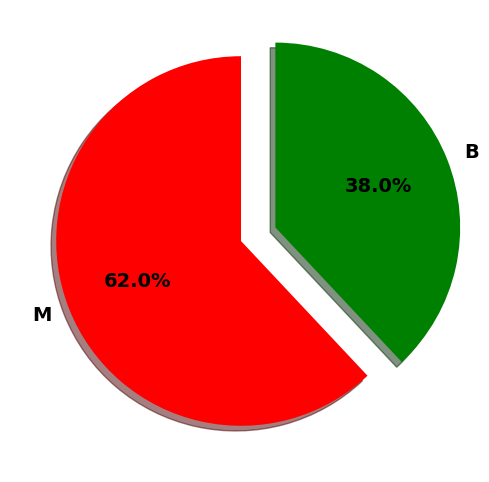

In [15]:
# Plot Diagnosis Distribution


df_dr = df['diagnosis_result'].value_counts()

colors = ['red', 'green']  # Example colors for each slice
label = [df_dr.index.tolist()]
plt.pie(
        df_dr, labels=label[0],
        shadow=True,
        explode=(0.0, 0.2),
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontweight': 'bold','fontsize': 14})
plt.gcf().set_size_inches(12,6)
plt.show()

that 62% of the patients were diagnosed with malignant (cancerous). This means that 62% of the patients had prostate cancer while 38% of the patients were noncancerous (Benign).

In [16]:
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,M
96,22,14,78,451,0.105,0.071,0.190,0.066,B
97,19,27,62,295,0.102,0.053,0.135,0.069,B
98,21,24,74,413,0.090,0.075,0.162,0.066,B


In [17]:
## Encode the categorical variables for Correlation plot and model prediction
df['diagnosis_result'].replace({'M':0,'B':1},inplace=True)
df[0:10]

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,0
1,9,13,133,1326,0.143,0.079,0.181,0.057,1
2,21,27,130,1203,0.125,0.160,0.207,0.060,0
3,14,16,78,386,0.070,0.284,0.260,0.097,0
4,9,19,135,1297,0.141,0.133,0.181,0.059,0
5,25,25,83,477,0.128,0.170,0.209,0.076,1
6,16,26,120,1040,0.095,0.109,0.179,0.057,0
7,15,18,90,578,0.119,0.165,0.220,0.075,0
8,19,24,88,520,0.127,0.193,0.235,0.074,0
9,25,11,84,476,0.119,0.240,0.203,0.082,0


In [18]:
# Correlation Matrix Plot
corr_metrics = df.corr()
corr_metrics_rounded = corr_metrics.round(2)
corr_metrics_rounded.style.background_gradient(cmap='RdYlGn')

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
radius,1.000000,0.100000,-0.240000,-0.250000,-0.130000,-0.190000,-0.040000,-0.030000,0.180000
texture,0.100000,1.000000,-0.110000,-0.110000,0.100000,0.030000,0.080000,0.140000,-0.070000
perimeter,-0.240000,-0.110000,1.000000,0.980000,0.270000,0.530000,0.200000,-0.200000,-0.610000
area,-0.250000,-0.110000,0.980000,1.000000,0.210000,0.420000,0.110000,-0.270000,-0.560000
smoothness,-0.130000,0.100000,0.270000,0.210000,1.000000,0.470000,0.420000,0.370000,-0.200000
compactness,-0.190000,0.030000,0.530000,0.420000,0.470000,1.000000,0.680000,0.650000,-0.510000
symmetry,-0.040000,0.080000,0.200000,0.110000,0.420000,0.680000,1.000000,0.570000,-0.230000
fractal_dimension,-0.030000,0.140000,-0.200000,-0.270000,0.370000,0.650000,0.570000,1.000000,-0.010000
diagnosis_result,0.180000,-0.070000,-0.610000,-0.560000,-0.200000,-0.510000,-0.230000,-0.010000,1.000000


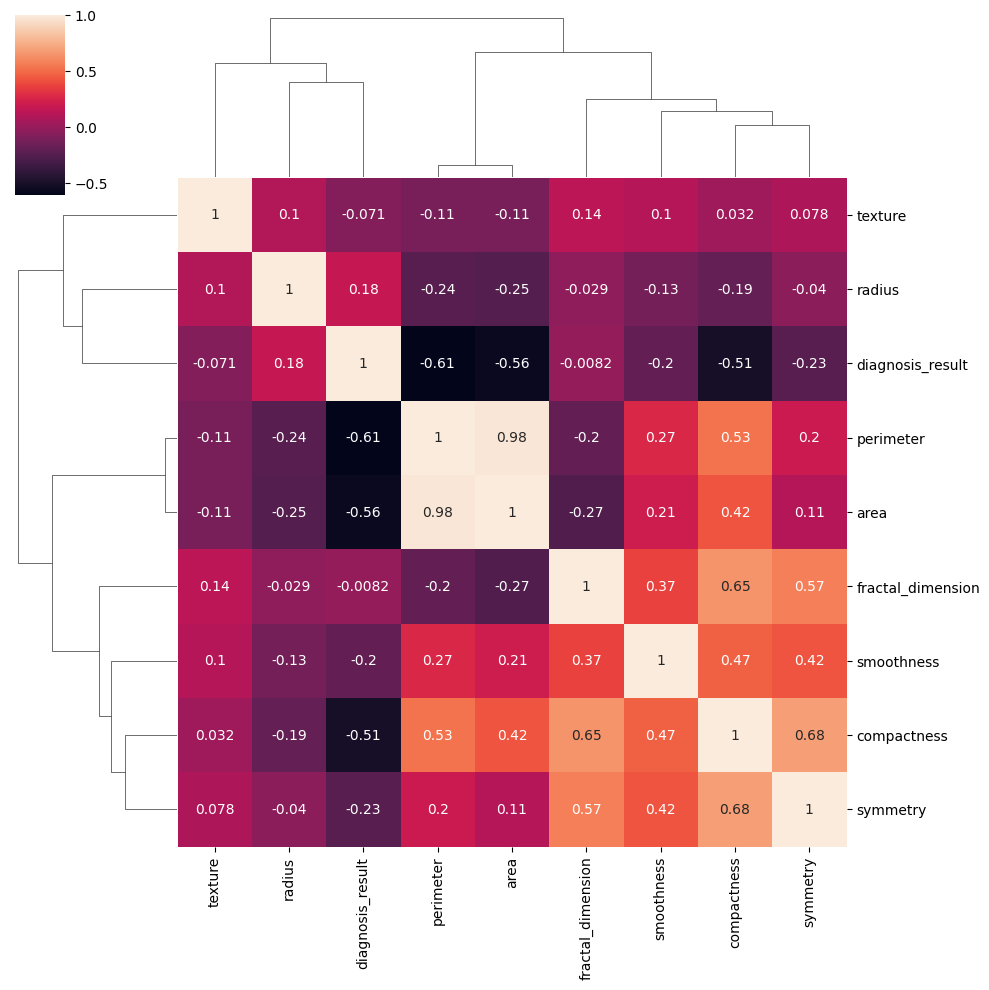

In [19]:
# Hierarchical Clustering

sns.clustermap(df.corr(),annot=True)

The hierarchical cluster heatmap shows that there are two clusters (radius and texture are in one cluster while the other variables are in the other cluster). The heatmap also shows the correlation between the variables.  Area and Perimeter have a high positive correlation of 0.98 while area and fractal dimension have a negative correlation of -0.27. A positive correlation indicates that an increase or decrease in either of the variables increases or decreases the other and a negative correlation indicates that a decrease or increase in either of the variables increases or decreases the other (Mcleod, 2023).

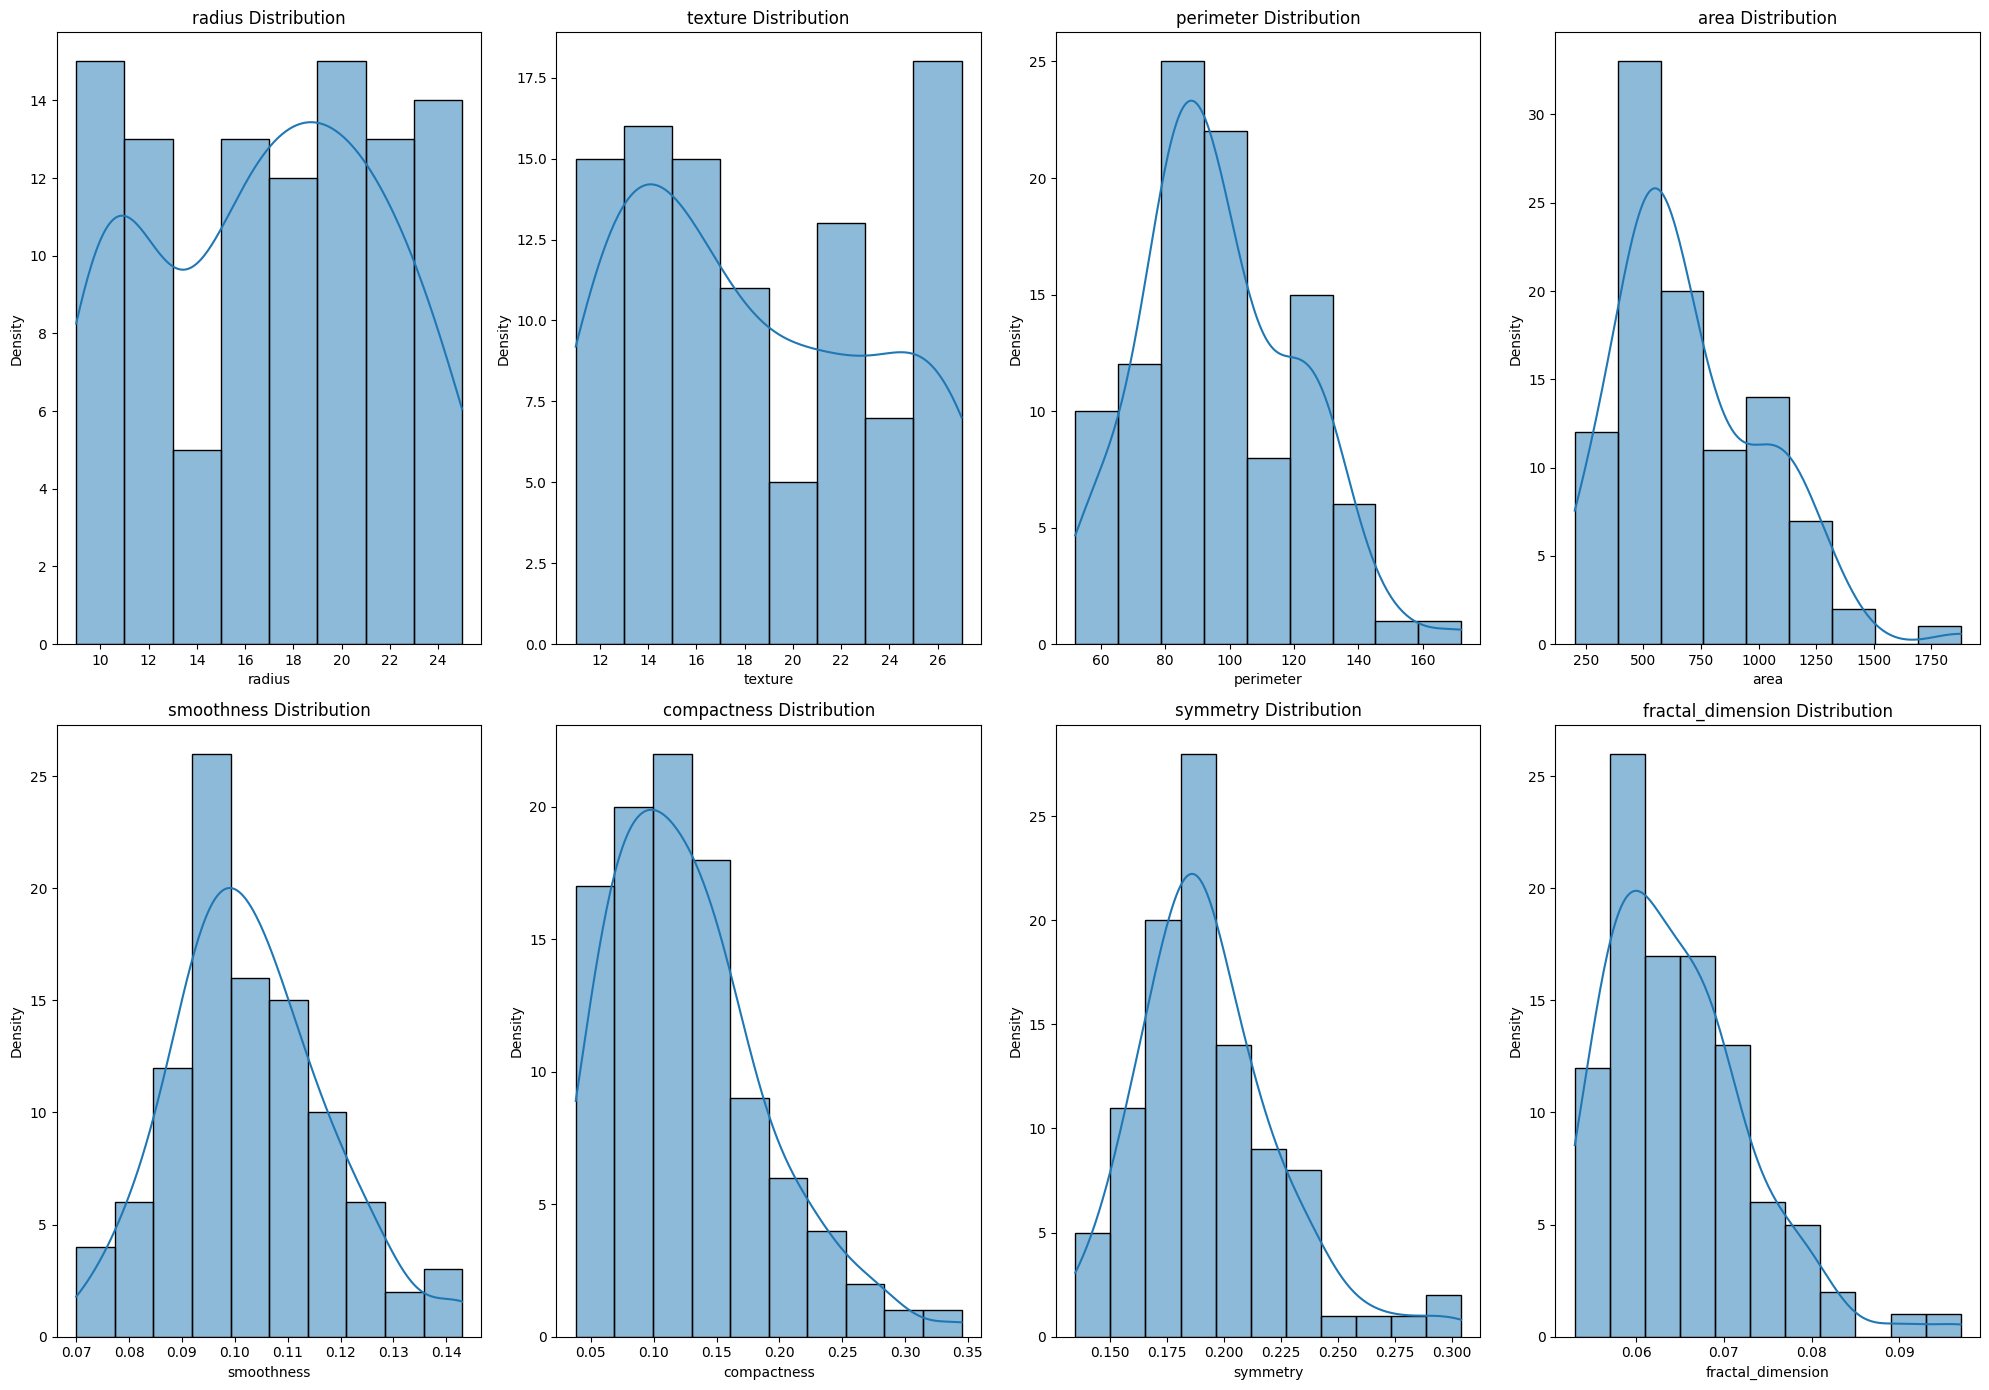

In [20]:
# Normality Distribution Plot

plt.figure(figsize=(20, 14))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

The fields are not normally distributed as most of them tend to be slightly skewed. The fractal dimension variable is positively skewed as seen in the figure. This is the same for all variables except the radius which is negatively skewed. The skewness of the dataset can also be deduced from the figure: a negatively skewed distribution has a mean that is less than its median, whereas a skewed positive distribution has a mean that is greater than its median.

In [21]:
# Calculate skewness of the dataset
skewness = df.skew()

# Print the skewness values
print(skewness)

radius              -0.054675
texture              0.293947
perimeter            0.445828
area                 0.836280
smoothness           0.463372
compactness          0.975305
symmetry             0.974503
fractal_dimension    1.153390
diagnosis_result     0.502013
dtype: float64


<ipython-input-22-b21f725443bd>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b21f725443bd>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b21f725443bd>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

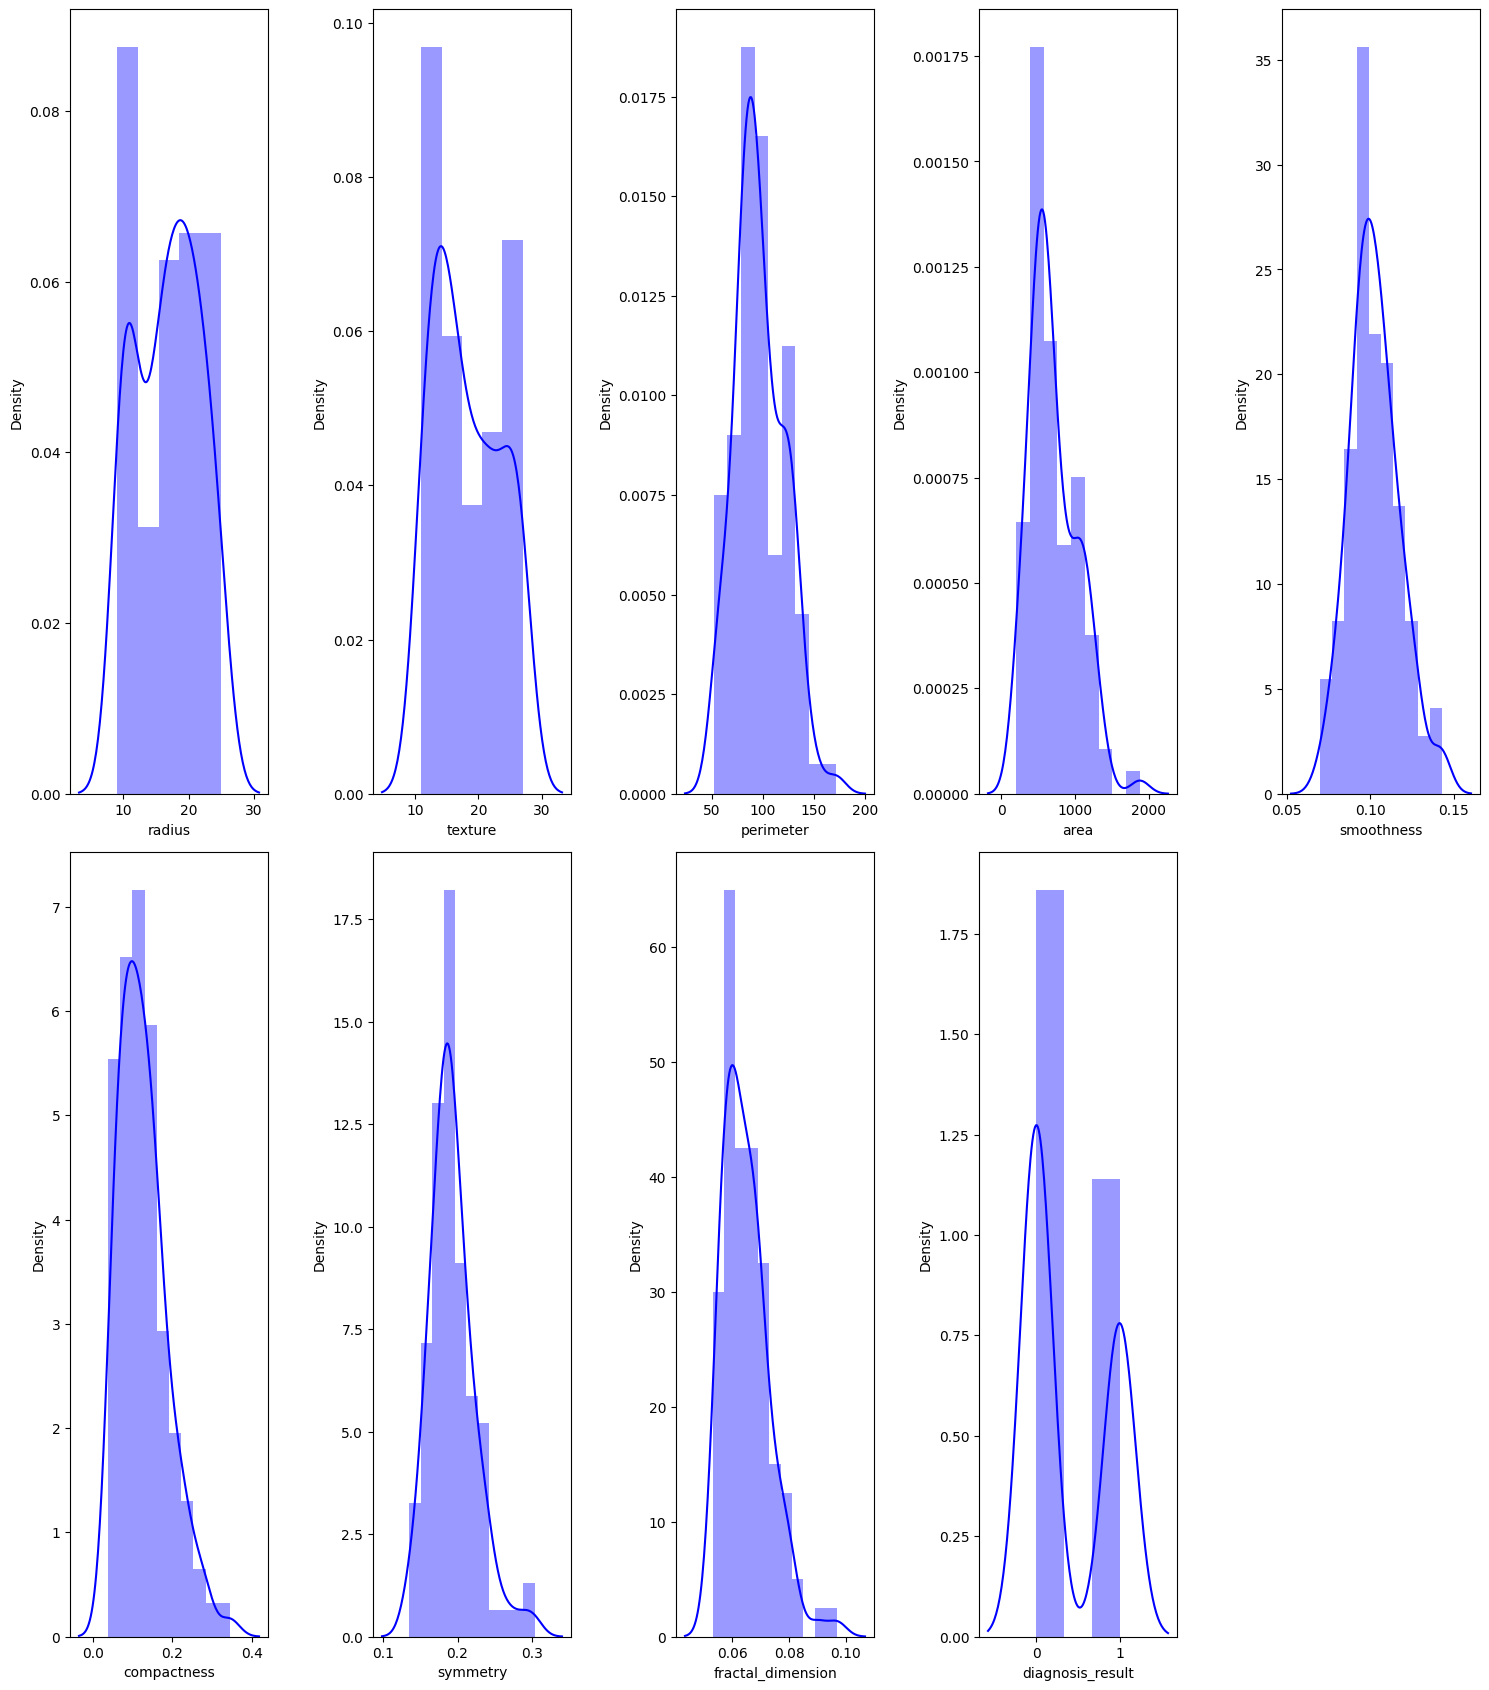

In [22]:
# checking numerical features distribution
plt.figure(figsize = (15, 25))
plotnumber = 1
for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='blue',)
        plt.xlabel(column)


    plotnumber += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



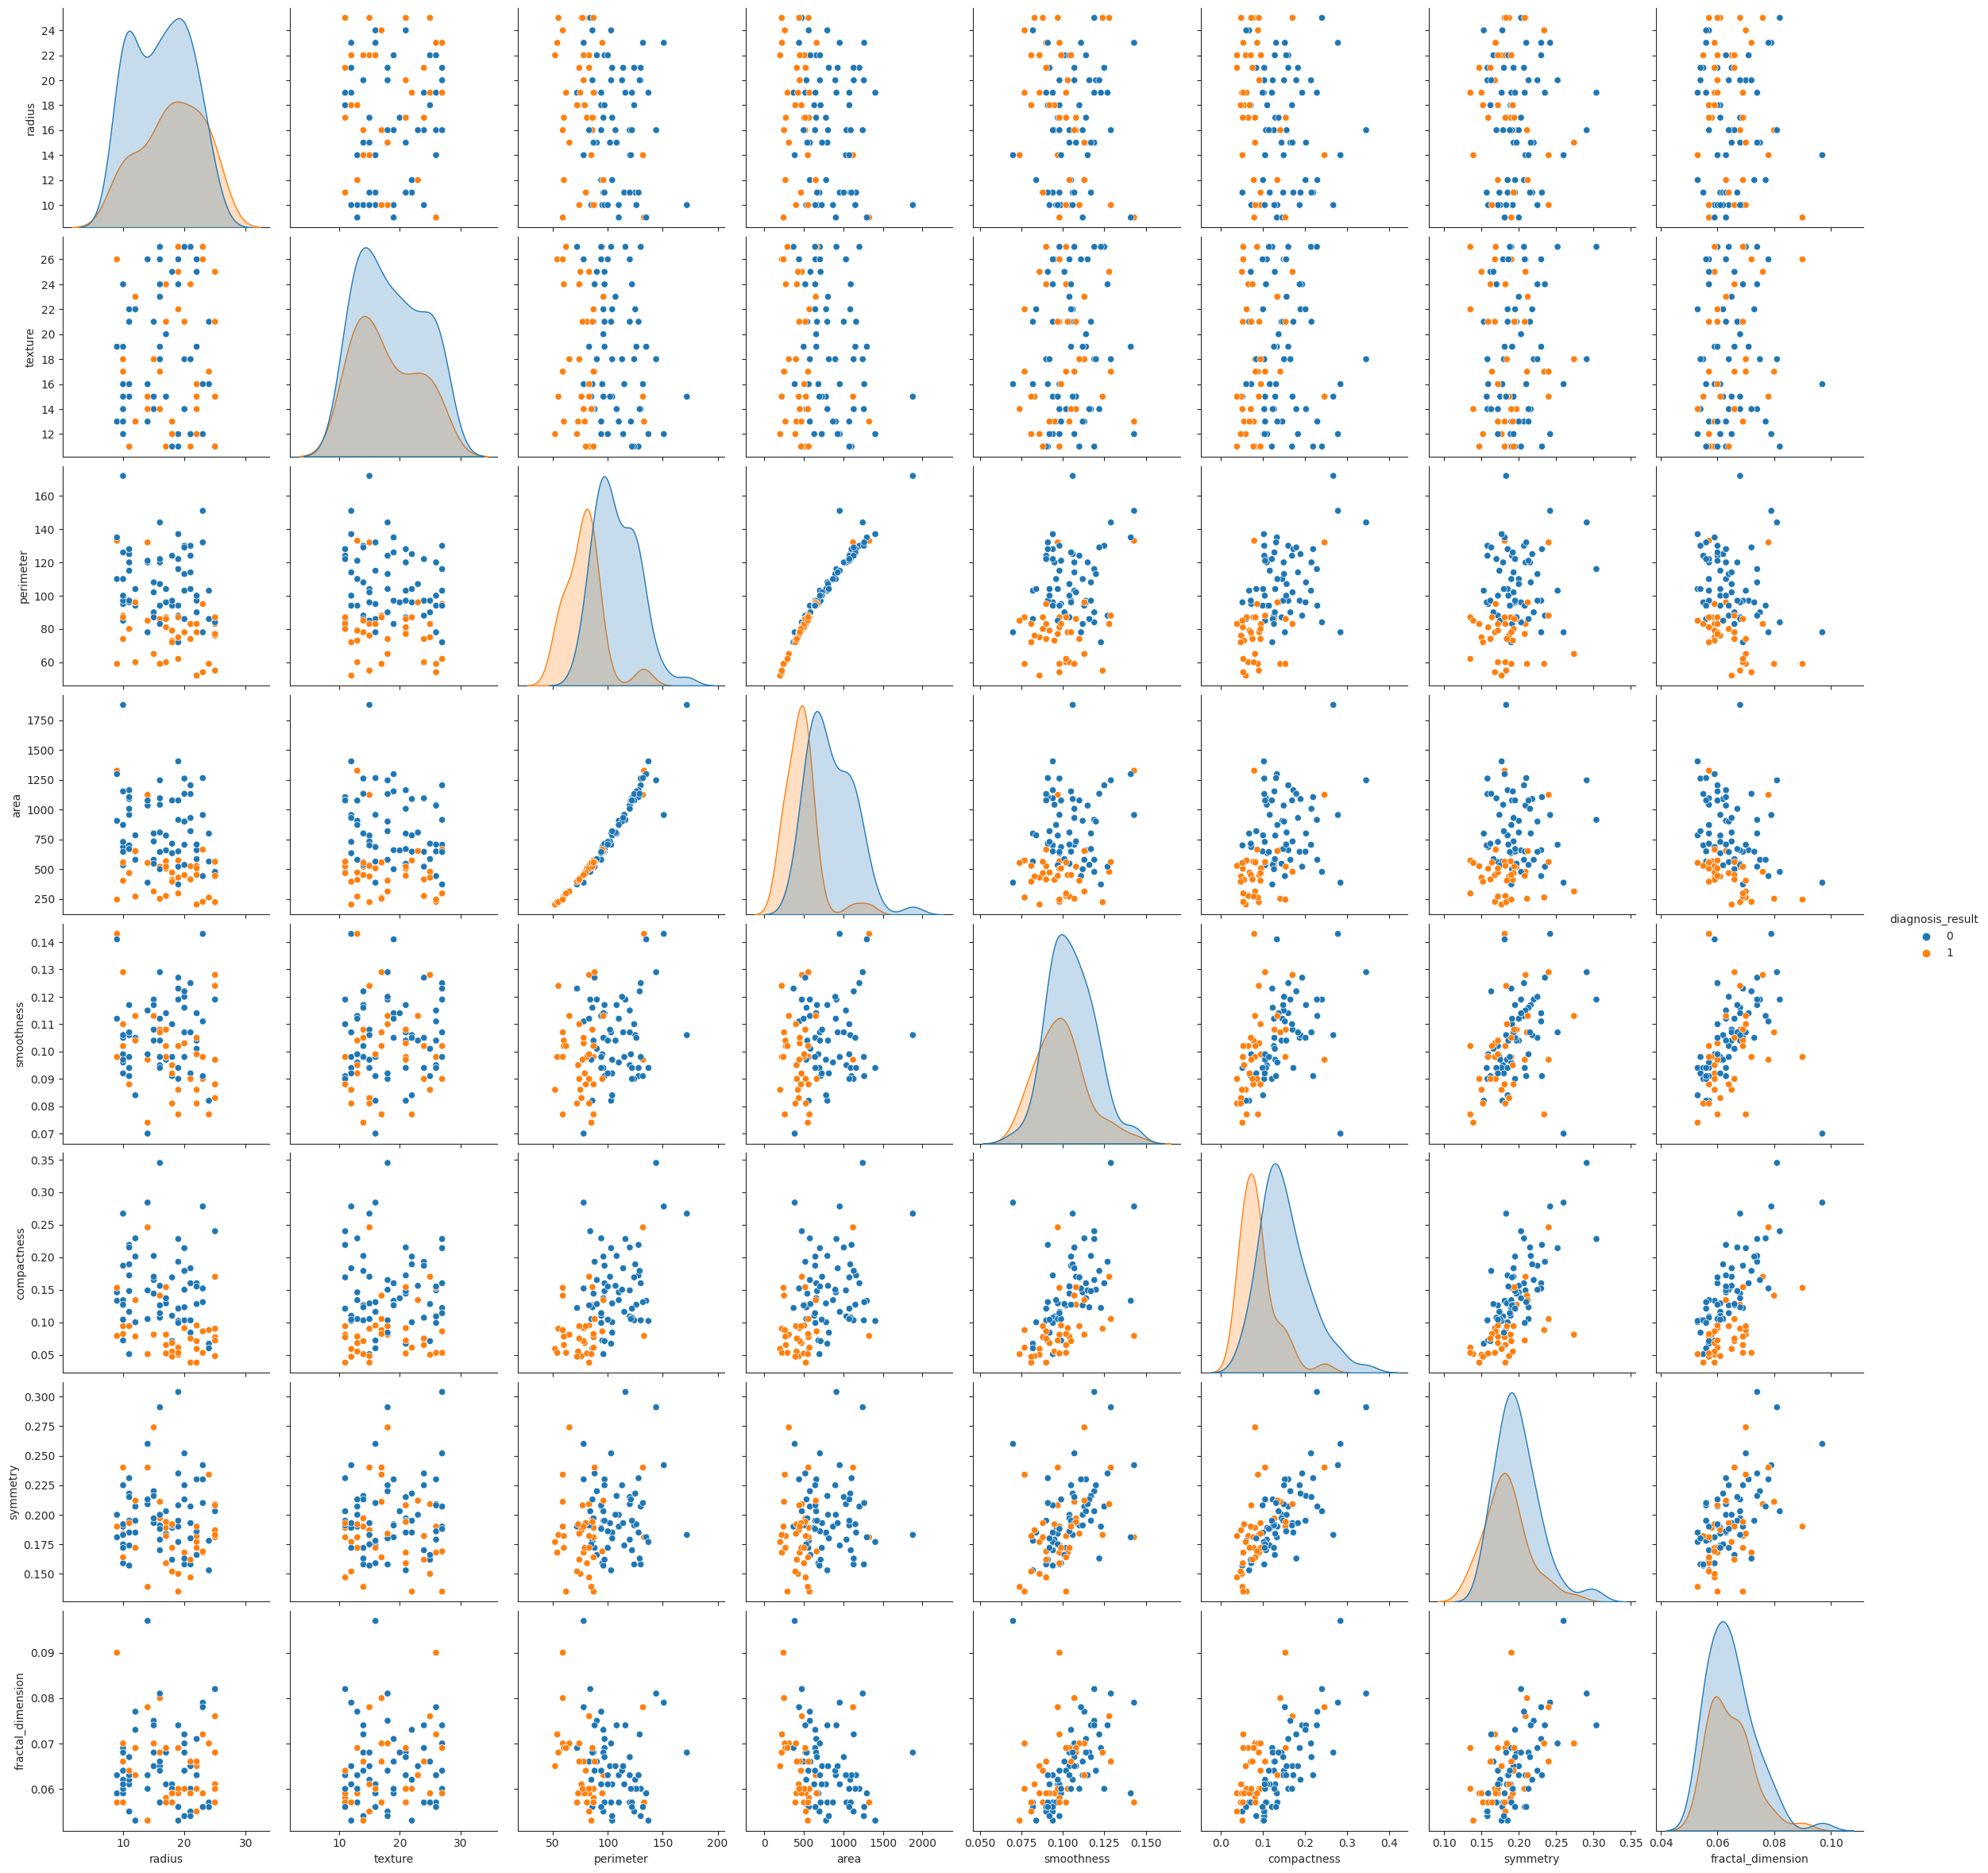

In [23]:
# SNS Pair Plot

sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis_result",size=3);
plt.show()

## Model Training and Prediction

In [24]:
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,0
1,9,13,133,1326,0.143,0.079,0.181,0.057,1
2,21,27,130,1203,0.125,0.160,0.207,0.060,0
3,14,16,78,386,0.070,0.284,0.260,0.097,0
4,9,19,135,1297,0.141,0.133,0.181,0.059,0
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,0
96,22,14,78,451,0.105,0.071,0.190,0.066,1
97,19,27,62,295,0.102,0.053,0.135,0.069,1
98,21,24,74,413,0.090,0.075,0.162,0.066,1


In [25]:
#Check the OmniXAI Tabular Instance

tabular_data

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  diagnosis_result  
0               0.079                 0  
1              

In [26]:
transformer = TabularTransform(
    target_transform=Identity()
).fit(tabular_data)


# TabularTransform is a transform that is specifically built for tabular data.
# It transforms categorical features to one-hot encoding by default and retains continuous-valued features.
# TabularTransform’s transform method will convert a Tabular instance into a NumPy array.
# If the Tabular instance contains a target column, the target will be the final column of the modified NumPy array.

In [27]:
tabular_data [0:10]

   radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0      23       12        151   954       0.143        0.278     0.242   
1       9       13        133  1326       0.143        0.079     0.181   
2      21       27        130  1203       0.125        0.160     0.207   
3      14       16         78   386       0.070        0.284     0.260   
4       9       19        135  1297       0.141        0.133     0.181   
5      25       25         83   477       0.128        0.170     0.209   
6      16       26        120  1040       0.095        0.109     0.179   
7      15       18         90   578       0.119        0.165     0.220   
8      19       24         88   520       0.127        0.193     0.235   
9      25       11         84   476       0.119        0.240     0.203   

   fractal_dimension  diagnosis_result  
0              0.079                 0  
1              0.057                 1  
2              0.060                 0  
3              0.097 

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost

np.random.seed(1)
transformer = TabularTransform().fit(tabular_data)
class_names = transformer.class_names
x = transformer.transform(tabular_data)
train, test, labels_train, labels_test = train_test_split(x[:, :-1], x[:, -1], train_size=0.80)
print('Training data shape: {}'.format(train.shape))
print("============================================")
print('Test data shape:     {}'.format(test.shape))



Training data shape: (80, 10)
Test data shape:     (20, 10)


the TabularTransform instance was used to convert categorical features to one-hot encoding. The transform method of TabularTransform can convert a Tabular instance into a NumPy array and if the Tabular instance has a target column, it will be the last column in the changed NumPy array. The dataset was then split for training (80%) and testing (20%).

#### XGBoost

In [29]:
gbtree = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
gbtree.fit(train, labels_train)


print('Test accuracy: {}'.format(accuracy_score(labels_test, gbtree.predict(test))))
print("=============================================================================")
print(classification_report(labels_test,gbtree.predict(test)))
print("=============================================================================")
print(confusion_matrix(labels_test,gbtree.predict(test)))

Test accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[12  0]
 [ 0  8]]


#### Logistic Regression

In [30]:

oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(train, labels_train)
model = Pipeline(steps = [('scale',StandardScaler()),('lr',LogisticRegression())])
model.fit(X_train_balanced, y_train_balanced)


print('Test accuracy: {}'.format(accuracy_score(labels_test, model.predict(test))))
print("=============================================================================")
print(classification_report(labels_test,model.predict(test)))
print("=============================================================================")
print(confusion_matrix(labels_test,model.predict(test)))


train_data = transformer.invert(X_train_balanced)
test_data = transformer.invert(test)

Test accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[12  0]
 [ 0  8]]


#### Random Forest Classifier

In [31]:
#balance classes in training set
oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(train, labels_train)
model_rf = Pipeline(steps = [('scale',StandardScaler()),('rf',RandomForestClassifier())])
model_rf.fit(X_train_balanced, y_train_balanced)


print('Test accuracy: {}'.format(accuracy_score(labels_test, model_rf.predict(test))))
print("=============================================================================")
print(classification_report(labels_test,model_rf.predict(test)))
print("=============================================================================")
print(confusion_matrix(labels_test,model_rf.predict(test)))

Test accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[12  0]
 [ 0  8]]


The random forest and logistic regression classifiers were able to classify all the instances in the test data. Both the actual and predictive positive instances (recall and precision) were predicted accurately by the models. The test data had a total of 20 instances with 12 of them having the Malignant diagnosis results while 8 had Benign.

## Explainers (LIME, SHAP & PDP) for Logistic Regression Model

In [32]:
predict_function=lambda z: model.predict_proba(transformer.transform(z))

In [33]:


explainer = LimeTabular(
    training_data=tabular_data,
    predict_function=predict_function
)
# Apply an inverse transform, i.e., converting the numpy array back to `Tabular`
test_instances = transformer.invert(test)
test_x = test_instances[1653:1655]



In [34]:
preprocess = lambda z: transformer.transform(z)
explainers = TabularExplainer(
    explainers=["lime", "shap", "mace", "pdp"],
    mode="classification",
    data=train_data,
    model=model,
    preprocess=preprocess,
    params={
        "lime": {"kernel_width": 4},
        "shap": {"nsamples": 200},
    }
)

In [35]:
test_instances = test_data[10:15]
local_explanations = explainers.explain(X=test_instances)
global_explanations = explainers.explain_global(
    params={"pdp": {"features": ['diagnosis_result']}}
)
analyzer = PredictionAnalyzer(
    mode="classification",
    test_data=test_data,
    test_targets=labels_test,
    model=model,
    preprocess=preprocess
)
prediction_explanations = analyzer.explain()

  0%|          | 0/5 [00:00<?, ?it/s]

### Evaluation of Predicted Class 0 (Malignant)

A prostate cell with a symmetry of 0.192, perimeter of 126, area of 1152, texture of 19, compactness of 0.127, and fractal dimension of 0.060. radius of 10 and smoothness of 0.105 is predicted as Malignant by the logistic regression model which is an accurate prediction. Cells that have a larger size tend to be considered Malignant. In addition to the digital rectal examination, PSA blood tests, other scans, and biopsy (Cancer Research UK, 2023). The OmniXAI LIME and SHAP explainers identified the perimeter attribute as the most important feature. LIME assigned the feature an importance score of 0.022 while SHAP assigned an importance score of 0.31. Next to the perimeter feature in the order of importance is the area feature. It had an importance score of 0.29 for SHAP and 0.018. The fractal dimension, radius, symmetry, and smoothness features are less important for this prediction. The features were sorted in descending order of importance for the SHAP explainer. This makes it easier to read and comprehend compared to LIME’s plot. All features positively influenced the prediction of the models.

#### LIME EXPLAINER FOR Predicted Class 0 (Malignant)

In [36]:
index=2
print("LIME results:")
local_explanations["lime"].ipython_plot(index)

LIME results:


#### SHAP EXPLAINER FOR Predicted Class 0 (Malignant)

In [37]:
index=2
print("SHAP results:")
local_explanations["shap"].ipython_plot(index)

SHAP results:


#### PDP EXPLAINER FOR Predicted Class 0 (Malignant)

In [38]:
index=0
print("PDP results:")
global_explanations["pdp"].ipython_plot(
    features=['diagnosis_result'])

PDP results:


### Evaluation of Predicted Class 1 (Benign)

A prostate cell with a symmetry of 0.139, perimeter of 85, area of 552, texture of 14, compactness of 0.051, radius of 14 and smoothness of 0.074 is predicted as Benign by the logistic regression model. The OmniXAI LIME and SHAP explainers identified the compactness attribute as the most important feature for this prediction. LIME assigned the feature an importance score of 0.02 while SHAP assigned an importance score of 0.34. For LIME, the next important feature after compactness is the area with an importance score of 0.006 while the SHAP importance score for area is 0.095. For SHAP, the next important feature after compactness is the perimeter with an importance score of 0.12 while the LIME importance score for the perimeter is 0.0058. The fractal dimension, radius, symmetry, and smoothness features respectively impacted the predictions negatively

#### LIME EXPLAINER FOR Predicted Class 1 (Benign)

In [39]:
index=0
print("LIME results:")
local_explanations["lime"].ipython_plot(index)

LIME results:


#### SHAP EXPLAINER FOR Predicted Class 1 (Benign)

In [40]:
index=0
print("SHAP results:")
local_explanations["shap"].ipython_plot(index)

SHAP results:


#### PDP EXPLAINER FOR Predicted Class 1 (Benign)

In [41]:
index=2
print("PDP results:")
global_explanations["pdp"].ipython_plot(
    features=['diagnosis_result'])

PDP results:


## Dashboard of Explainers

In [42]:
dashboard = Dashboard(
    instances=test_instances,
    local_explanations=local_explanations,
    global_explanations=global_explanations,
    prediction_explanations=prediction_explanations,
    class_names=class_names
)
dashboard.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>